In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("house_price_prediction_dataset.csv")
df.head()


,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Bathroom,GarageCars,Neighborhood,SalePrice
0,7770,9,1,2010,3232,2,3,1,Urban,577542
1,1360,4,7,2016,2548,1,1,0,Urban,390857
2,5890,5,3,1955,1782,3,1,1,Suburb,329480
3,5691,4,8,1958,1803,2,2,2,Downtown,322308
4,6234,5,3,1955,1219,3,1,0,Rural,266801


In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       500 non-null    int64 
 1   OverallQual   500 non-null    int64 
 2   OverallCond   500 non-null    int64 
 3   YearBuilt     500 non-null    int64 
 4   GrLivArea     500 non-null    int64 
 5   BedroomAbvGr  500 non-null    int64 
 6   Bathroom      500 non-null    int64 
 7   GarageCars    500 non-null    int64 
 8   Neighborhood  500 non-null    object
 9   SalePrice     500 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 39.2+ KB


,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Bathroom,GarageCars,SalePrice
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5288.016000,4.976000,4.902000,1983.754000,2180.550000,2.982000,1.980000,1.464000,388540.784000
std,2667.660469,2.574623,2.664319,20.891971,1003.090962,1.421872,0.832458,1.134583,126045.075863
min,504.000000,1.000000,1.000000,1950.000000,416.000000,1.000000,1.000000,0.000000,128983.000000
25%,3045.500000,3.000000,2.000000,1965.000000,1272.250000,2.000000,1.000000,0.000000,288599.000000
50%,5457.000000,5.000000,5.000000,1984.000000,2229.000000,3.000000,2.000000,1.000000,390243.000000
75%,7583.750000,7.000000,7.000000,2000.250000,2970.500000,4.000000,3.000000,2.000000,488465.250000
max,9992.000000,9.000000,9.000000,2021.000000,3986.000000,5.000000,3.000000,3.000000,671317.000000


In [5]:
df.isnull().sum()


LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
GrLivArea       0
BedroomAbvGr    0
Bathroom        0
GarageCars      0
Neighborhood    0
SalePrice       0
dtype: int64

In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)


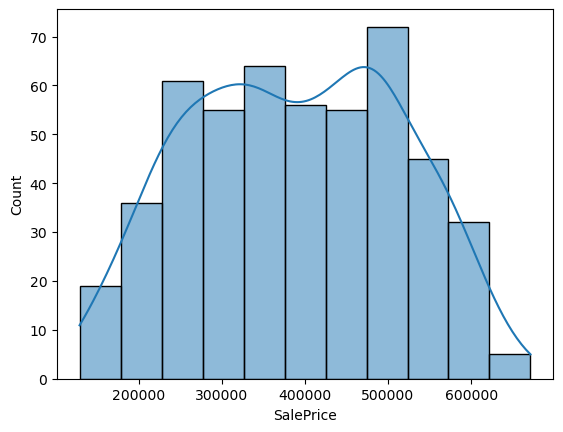

In [7]:
sns.histplot(df['SalePrice'], kde=True)
plt.show()


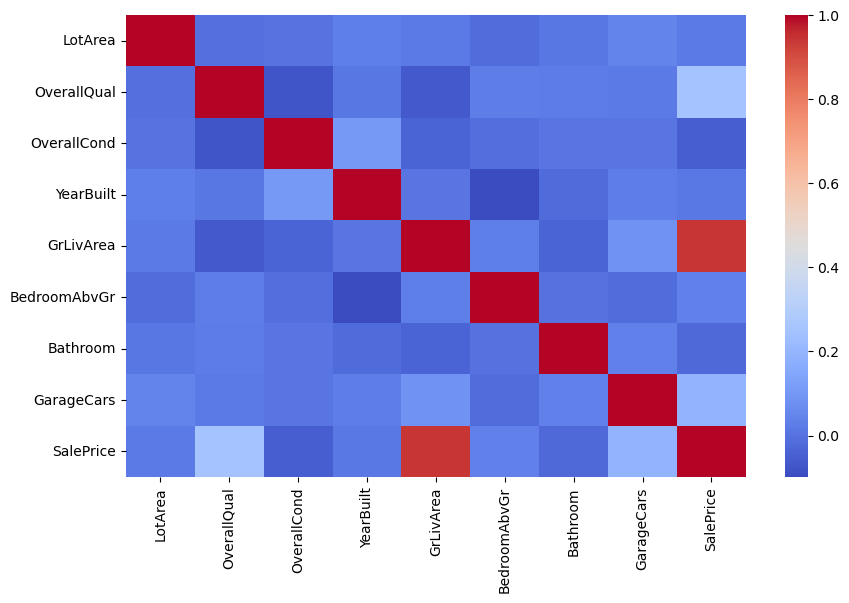

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.show()


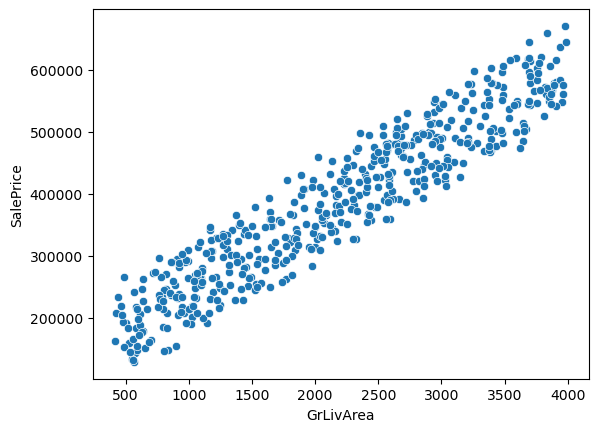

In [9]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()


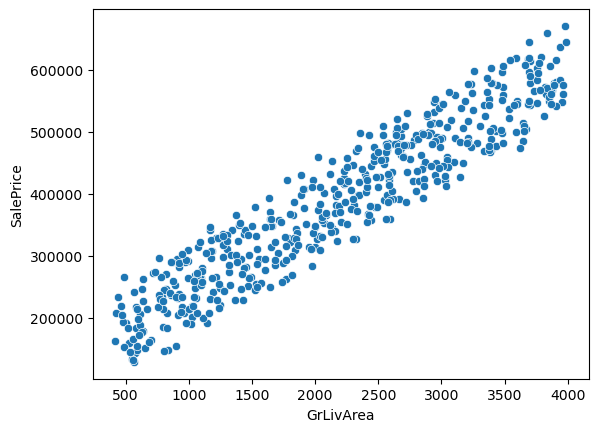

In [10]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()


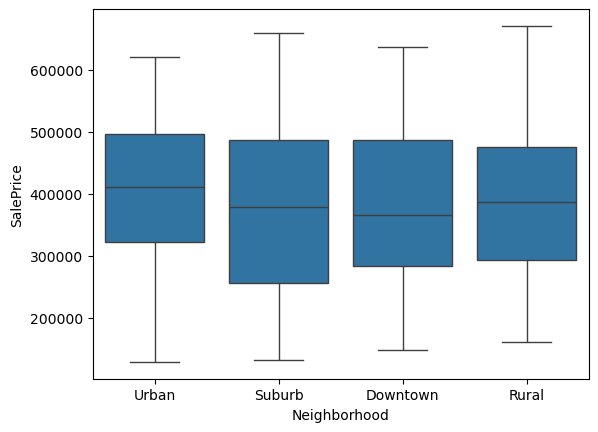

In [11]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.show()


In [12]:
le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])



In [13]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)


In [17]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 7442.887346194353
MSE: 75131076.33965343
RMSE: 8667.818430242609
R2 Score: 0.9948699030394731


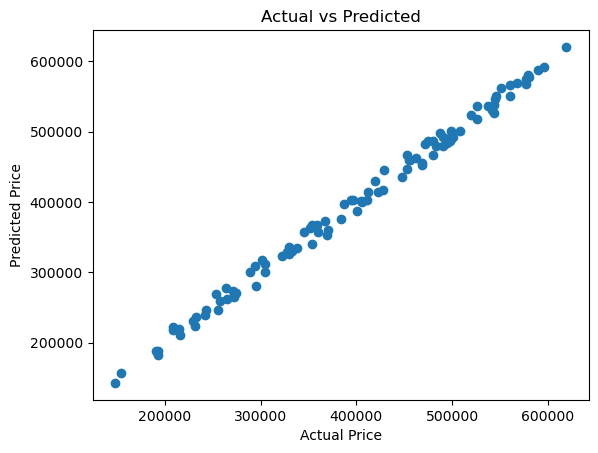

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()